In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ellipord, ellip
from scipy.signal import buttord, butter
from scipy.signal import cheb1ord, cheby1
from scipy.signal import cheb2ord, cheby2
from scipy.fft import fft, fftfreq
from scipy.signal import sosfreqz, sosfilt

In [3]:
fs = 1200
f1, f2 = 100, 200
delta_p = 1
delta_s = 40

wp = [f1 / (fs / 2), f2 / (fs / 2)]
ws = [(f1 - f1 * 0.1) / (fs / 2), (f2 + f2 * 0.1) / (fs / 2)]
N, Wn = ellipord(wp, ws, delta_p, delta_s)
sos = ellip(N, delta_p, delta_s, Wn, btype="bandpass", output='sos')



C:\Users\david\AppData\Local\Temp\ipykernel_14800\362732185.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)))


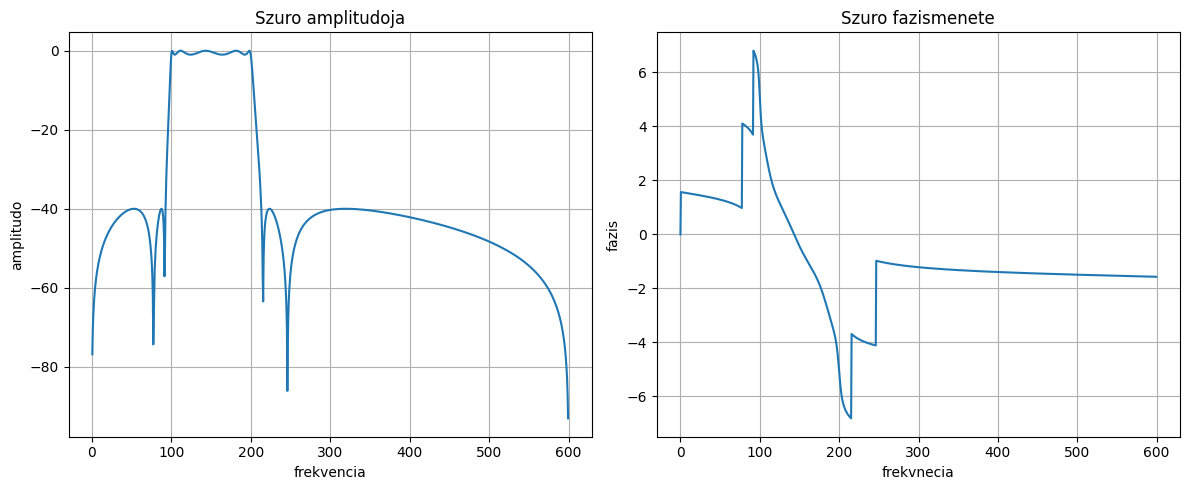

In [4]:
w, h = sosfreqz(sos, worN=1024, fs=fs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("Szuro amplitudoja")
plt.xlabel("frekvencia")
plt.ylabel("amplitudo")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title("Szuro fazismenete")
plt.xlabel("frekvnecia")
plt.ylabel("fazis")
plt.grid()

plt.tight_layout()
plt.show()

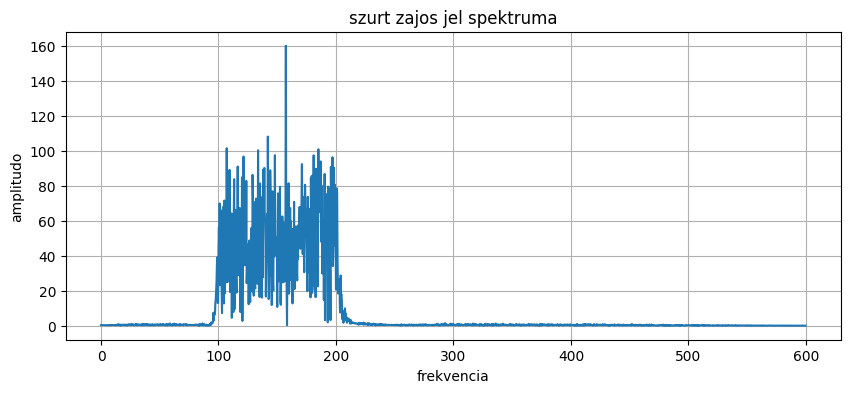

In [13]:
duration = 3
t = np.arange(0, duration, 1/fs)
noise = np.random.normal(0, 1, size=len(t))

filtered_noise = sosfilt(sos, noise)

n = len(filtered_noise)
f = fftfreq(n, d=1/fs)[:n//2]
spectrum = np.abs(fft(filtered_noise))[:n//2]

plt.figure(figsize=(10, 4))
plt.plot(f, spectrum)
plt.title("szurt zajos jel spektruma")
plt.xlabel("frekvencia")
plt.ylabel("amplitudo")
plt.grid()
plt.show()